In [64]:
BASE_DIR = '../'*3
MODEL_DIR = BASE_DIR +'code/CNN/cnn_basic/cnn_basic_model.ipynb'
FLW_DIR = BASE_DIR + 'code/UTIL/dataset/flower_prepro.ipynb'
OFFICE_DIR = BASE_DIR +'code/UTIL/dataset/office31_prepro.ipynb'
%run {MODEL_DIR}
%run {FLW_DIR}
%run {OFFICE_DIR}

Using device: cuda
GeForce GTX 1660 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.1 GB
Using PyTorch version: 1.7.1
Using device: cuda
GeForce GTX 1660 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.1 GB
Using PyTorch version: 1.7.1


In [59]:
EPOCH = 10
BATCH_SIZE=30
NUM_WORKERS=0
LEARNING_RATE = 0.00005

In [61]:
fd = FlowersDataset([96, 96], [96, 96, 3])

alloc_full_layer
alloc_full_layer
[[Linear(in_features=30000, out_features=30, bias=True), ReLU()]]
Model flowers_model_1 train started 


여기
!!!!!!!!!!!
!! Layer !! .
!!!!!!!!!!! 

 Net(
  (layer1): Sequential(
    (0): Linear(in_features=30000, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=5, bias=True)
  )
)

!!!!!!!!!!!!!!!
!! optimizer !! 
!!!!!!!!!!!!!!! 

 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 5e-05
    weight_decay: 0
)
    Epoch 1: cost=21.289, accuracy=0.268/0.290 (1/1 secs)
    Epoch 1: cost=13.483, accuracy=0.299/0.230 (0/1 secs)
    Epoch 2: cost=1.620, accuracy=0.180/0.160 (1/2 secs)
    Epoch 2: cost=1.616, accuracy=0.182/0.170 (0/2 secs)
    Epoch 3: cost=1.611, accuracy=0.183/0.190 (0/2 secs)
    Epoch 3: cost=1.611, accuracy=0.180/0.130 (0/2 secs)
    Epoch 4: cost=1.611, accuracy=0.175/0.150 (1/3 secs)
    Epoch 4: cost=1.611, accuracy=0.171/0.130 (0/3 secs)
    Epoch 5: c

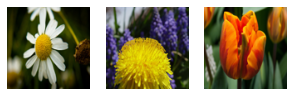

추정확률분포 [20,20,20,21,20] => 추정 sunflower : 정답 daisy => X
추정확률분포 [20,20,20,21,20] => 추정 sunflower : 정답 dandelion => X
추정확률분포 [20,20,20,21,20] => 추정 sunflower : 정답 tulip => X


In [60]:
#SGD
fm = CnnBasicModel('flowers_model_1', fd, ['full',{'width':30\
                                                   ,'actfunc':'relu'}])
fm.exec_all(epoch_count=EPOCH, report=40, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )

In [65]:
#SGD
fm = CnnBasicModel('flowers_model_1', fd, [['conv', {'ksize':3, 'chn':6}], 
                ['max', {'stride':2}], 
                ['conv', {'ksize':3, 'chn':12}], 
                ['max', {'stride':2}], 
                ['conv', {'ksize':3, 'chn':24}], 
                ['avg', {'stride':3}]])
fm.exec_all(epoch_count=EPOCH, report=40, batch_size =BATCH_SIZE \
           , learning_rate = LEARNING_RATE , num_workers = NUM_WORKERS \
          )


alloc_conv_layer


AssertionError: 